# I. Binary classification

## MNIST Dataset loading (70k samples of manuscript digits)

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
#puts data in X = all pixels of each image, puts target digits in y
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


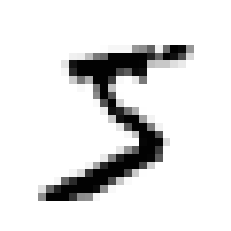

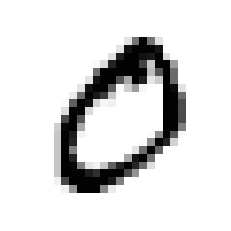

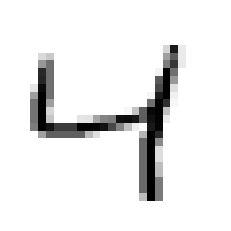

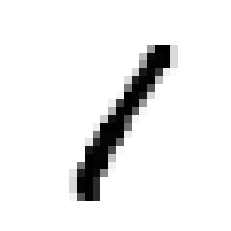

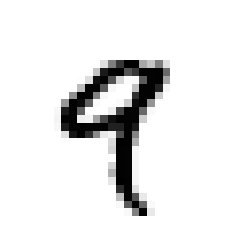

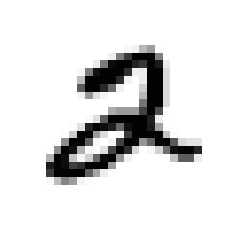

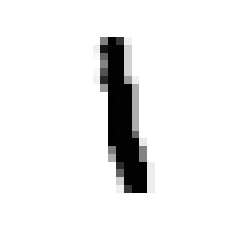

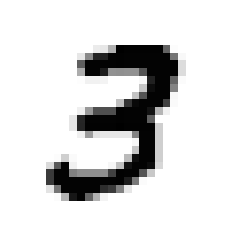

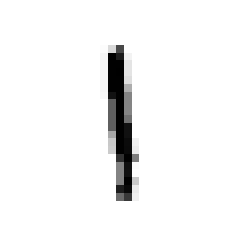

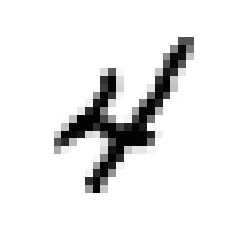

In [3]:
#displays some data, for performance, reshape 
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in range(10):
    some_digit = X.to_numpy()[i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap="Greys")
    plt.axis("off")
    plt.show()

In [4]:
#y is natively considered as a list of strings, we force the type as integers
y=y.astype(np.uint8)

# # Split dataset into training and test sets

In [5]:
X_train,X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
X_train.shape

(60000, 784)

## Afin de réaliser une classification binaire, nous réduisons le problème a "le chiffre est-il un 5 ou tout autre nombre?", autrement dit une classification True/False

In [8]:
y_train5 = (y_train==5)
y_test5 = (y_test==5)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=42, n_estimators= 200)
clf.fit(X_train, y_train5)


RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
#predict on some_digit? Are they fives?
clf.predict([some_digit])

array([False])

In [10]:
#cross-validation based on the precision metric: the result will display the 3 folds precision scores.
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train5, cv=3, scoring="accuracy")

array([0.9891 , 0.9866 , 0.98655])

In [11]:
#train the classifier
y_predict = clf.predict(X_test)

In [12]:
#get confusion matrics for the trained classification model on the test set
#True Negative|False Positive
#False Negative|True Positive

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test5, y_predict)


array([[9104,    4],
       [ 112,  780]])

In [13]:
#recall and precision
#precision= TP/(TP+FP) => how good is the model to find the positives and not put negatives as positives
#recall= TP/(TP+FN) => ho good is the model to corretly find the positives and not put them as negatives
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test5, y_predict))
print(recall_score(y_test5, y_predict))

0.9948979591836735
0.874439461883408


In [14]:
#f1 score = 2*precision*recall/(precision+recall)
from sklearn.metrics import f1_score
f1_score(y_test5, y_predict)

0.9307875894988068

## WARNING !! The loop below can be time-consuming!! For the class sake, please lower the range of the loop!

In [15]:
precisions = []
recalls=[]
trees=[]

for i in range (1,100,20):
    clf=RandomForestClassifier(random_state=42, n_estimators= i)
    clf.fit(X_train, y_train5)
    y_predict=clf.predict(X_test)
    precisions.append(precision_score(y_test5, y_predict))
    recalls.append(recall_score(y_test5, y_predict))
    trees.append(i)


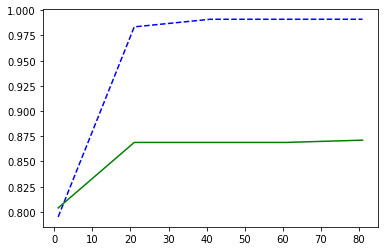

In [16]:

def plot_precision_recall_vs_tree(precisions, recalls, trees):
    plt.plot(trees, precisions, "b--", label="Precision")
    plt.plot(trees, recalls, "g-", label="Recall")
    
plot_precision_recall_vs_tree(precisions, recalls, trees)
plt.show()

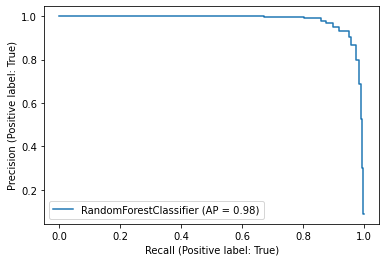

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
clf=RandomForestClassifier(random_state=42, n_estimators= 20)
clf.fit(X_train, y_train5)
disp = plot_precision_recall_curve(clf, X_test, y_test5)

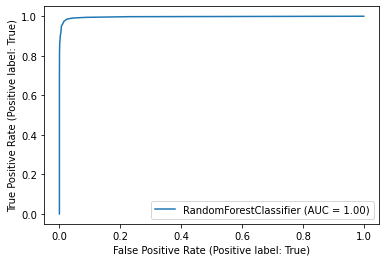

In [18]:
#Note that the roc curve is less significative than the precision-recall, in this case, as the dataset is imbalanced
from sklearn.metrics import plot_roc_curve
clf=RandomForestClassifier(random_state=42, n_estimators= 20)
clf.fit(X_train, y_train5)
clf_disp = plot_roc_curve(clf, X_test, y_test5)
plt.show()

try the following classifiers and compare:

-[K Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

-[C Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

-[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
precisions = []
recalls=[]
trees=[]

for i in range (1,100,20):
    clf=KNeighborsClassifier(5)
    clf.fit(X_train, y_train5)
    y_predict=clf.predict(X_test)
    precisions.append(precision_score(y_test5, y_predict))
    recalls.append(recall_score(y_test5, y_predict))
    trees.append(i)

plot_precision_recall_vs_tree(precisions, recalls, trees)
plt.show()

Cheik if the dataset is balanced, apply the adapted [Naive Bayes Classifier](https://scikit-learn.org/stable/modules/naive_bayes.html) (Gaussian if balanced, Complement if not)

In [ ]:
unique_elements, counts_elements = np.unique(mnist['target'], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))